# Actividad Guiada 2

# Marco Antonio Arcidiacono Alepuz

Descenso de gradiente para $f(x,y) = x^2 + y^2$ y para (parte extra) $f(x,y) = sin(1/2·x^2 - 1/4·y^2 + 3)·cos(2x + 1 - e^y)$

https://github.com/marcoantonio135/03MIAR-Algoritmos-de-Optimizacion

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

Descenso de gradiente para:

$$f(x,y) = x^2 + y^2$$

In [3]:
f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

Solucion: [-4.330786116680752e-05, 5.4572222793896184e-05] 4.853698339510116e-09


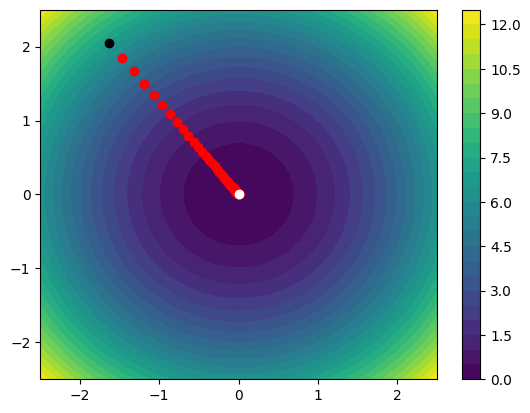

In [4]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango,rango,resolucion)
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))

for ix, x in enumerate (X):
    for iy, y in enumerate (Y):
        Z[ix,iy] = f([x,y])
        
contour = plt.contourf(X,Y,Z, resolucion)
cbar = plt.colorbar(contour)

P=[random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="black")
TA=0.05

for _ in range(100):
    grad=df(P)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c="red")
    
plt.plot(P[0], P[1], "o", c="White")
print("Solucion:", P, f(P))

### Parte extra

Descenso de gradiente para:

$$f(x,y) = sin(1/2·x^2 - 1/4·y^2 + 3)·cos(2x + 1 - e^y)$$

Para el cálculo de la tasa de aprendizaje, se utilizará el Método de Newton modificado, es decir, se utilizará:

$$γ_n = \frac{1}{|f''(x_n)|}$$

In [131]:
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])
df = lambda X: [np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)*X[0]*np.cos(2 * X[0] + 1 - np.e**X[1]) - 2*np.sin(2*X[0] - np.e**X[1] + 1)*np.sin(1/2 * X[0]**2 - 1/4 * X[0]**2 + 3),
               np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)*(-1/2*X[1])*np.cos(2 * X[0] + 1 - np.e**X[1]) + np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)*(- np.sin(2 * X[0] + 1 - np.e**X[1]))*(- np.e**X[1])]

#se utiliza la función de las diapositivas sobre df para calcular la segunda derivada:
def ddf(PUNTO):
    h = 0.01
    T = np.copy(PUNTO)
    grad = np.zeros(2)
    for it, th in enumerate(PUNTO):
        T[it] = T[it] + h
        grad[it] = (df(T)[it] - df(PUNTO)[it]) / h
    return grad

Inicio: [0.8267407884437428, -1.347427489240875] -0.18400630433193857
Solucion: [4.2212961454377576, -4.027748213316928] -0.9999999999999974
Pasos: 325


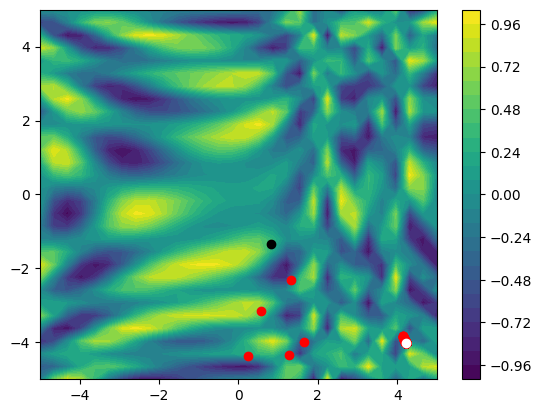

In [130]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango*2,rango*2,resolucion)
Y = np.linspace(-rango*2,rango*2,resolucion)
Z = np.zeros((resolucion,resolucion))

for ix, x in enumerate (X):
    for iy, y in enumerate (Y):
        Z[ix,iy] = f([x,y])
        
contour = plt.contourf(X,Y,Z, resolucion)
cbar = plt.colorbar(contour)

P=[random.uniform(-rango, rango), random.uniform(-rango, rango)]
print("Inicio:", P, f(P))
plt.plot(P[0], P[1], "o", c="black")
pasos = 0
stop = False
TA = 1.0/np.absolute(ddf(P))

while(stop == False):
    grad=df(P)
    Panterior = [P[0], P[1]]
    P[0], P[1] = P[0] - TA[0]*grad[0], P[1] - TA[1]*grad[1]
    pasos = pasos + 1
    TAanterior = [TA[0], TA[1]]
    TA = 1.0/np.absolute(ddf(P))
    
    #Cuando el punto anterior y el actual son muy cercanos,
    #se para porque se ha encontrado un mínimo o un punto muy cercano a un mínimo
    if (math.isclose(np.absolute(P[0]/Panterior[0]), 1.0) and math.isclose(np.absolute(P[1]/Panterior[1]), 1.0)):
        stop = True
    if (pasos == 500): #límite de iteraciones
        stop = True
    plt.plot(P[0], P[1], "o", c="red")
    
plt.plot(P[0], P[1], "o", c="White")
print("Solucion:", P, f(P))
print("Pasos:", pasos)